In [1]:
import xarray as xr
import dask
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import tqdm
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pickle
import pandas as pd
import itertools
import seaborn as sns
sns.set('paper')

colors =itertools.cycle(plt.get_cmap('plasma')(np.linspace(0.2,0.9, 3)))
colorA=next(colors)

colorC=next(colors)
colorB=next(colors)
#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)

color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

In [2]:
cluster_data_path = '/home/amh001/space_fs7/DATA/NEP36-CanOE/From_Andrew/'
#cluster_data_path = './'
clusters_ds=[]
for ii in range(6):
    
    cluster_files = sorted(glob.glob(f'{cluster_data_path}/processed/daily/by_year/by_cluster/n_clusters_6/cluster_{ii}*.nc')) 
    #print(cluster_files    )
    cluster_ds =xr.open_mfdataset(cluster_files, chunks={'time':439}, engine='h5netcdf')
    clusters_ds.append(cluster_ds)


In [3]:
hist_kwargs = {
    'alpha':1,
    'density':True,
    'bins':25,
    'edgecolor':'None'
}

In [4]:
plot_clusters = [0,1, 2,3 ,4,5]
plot_clusters2 = [1, 2,4 ,5]

subpanel = ['a','b','c','d', 'e', 'f', 'g','h','i','j']

cluster_names = {2:'2',1:'1',3:'Shallows', 4:'4', 0:'Canyons', 5:'5', 6:'6' }

In [5]:
def plot_myhist(X,bins,color, label):
    histogram, bins = np.histogram(X,  bins=bins, density =True); 
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    plt.plot(bin_centers, histogram, color =color, linewidth=1,label=label)

262.8805803045675
63.339926711807536
716.7499778953759
28.902779191472252
151.1059828218167
101.1585130954427


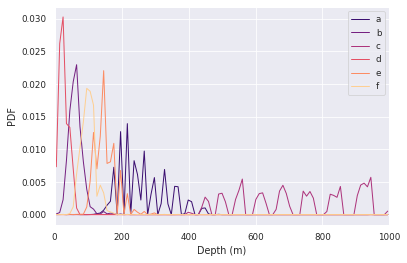

In [6]:
#for cluster_ds in clusters_ds:
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.9, 6)))# same as clusters plot

#colors =itertools.cycle(plt.get_cmap('inferno')(np.linspace(0.15,0.9, 6)))
a=0;b=1000
bins = np.linspace(a, b, 100)
subpanel = ['a','b','c','d', 'e', 'f', 'g','h','i','j']

for ii in np.arange(6):
    col=next(colors)
    cluster_id = plot_clusters[ii]
    D=clusters_ds[cluster_id].depths.values.flatten()
    print(D.mean())
    #plt.hist(D.flatten(),label='Shallows',density=True,  color=colorA)
    #plt.hist(D,label=subpanel[ii], **hist_kwargs, color=col)
    plot_myhist(D,bins,col, subpanel[ii])#cluster_names[ii])
plt.legend()
plt.ylabel('PDF')
plt.xlabel('Depth (m)')
plt.xlim([0,1000])
plt.savefig('../Figures/AllClusters_depths_100bins.png',bbox_inches='tight',transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

In [7]:
for cluster_ds in clusters_ds:
    cluster_ds['ALK_norm'] = 32.5*cluster_ds['ALK']/cluster_ds['S']
    cluster_ds['DIC_norm'] = 32.5*cluster_ds['DIC']/cluster_ds['S']

In [ ]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$[\mathrm{O}_2]$",
    OmegaA="$\Omega_A$",
    T="T"
    # ALK_norm="Normalized Alkalinity",
    # DIC_norm="Normalized DIC",
    # ALK="Alkalinity",
    # DIC="DIC",
)

units = dict(
    O2="mmol m$^{-3}$",
    OmegaA="(non-dimensional)",
    T="$^\circ$C",
    
    # ALK_norm="mmolk m$^{-3}$",
    # DIC_norm="mmolk m$^{-3}$",
    # ALK="mmolk m$^{-3}$",
    # DIC="mmolk m$^{-3}$"
)


for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters:
        plt.figure(figsize=(8,10))    
        for idx, var in enumerate(timeseries_vars):        
            plt.subplot(7,1,idx+1)
            cluster_ds[var].groupby('time.year').mean('time').mean('stacked_y_x').plot()
            print('cluster:', cluster_label, 'mean for ', var)
            print(cluster_ds[var].mean().values)
            if var =='O2':
                (cluster_ds[var].groupby('time.year').mean('time').mean('stacked_y_x')+cluster_ds['AOU'].groupby('time.year').mean('time').mean('stacked_y_x')).plot()
                cluster_ds['AOU'].groupby('time.year').mean('time').mean('stacked_y_x').plot()
                print('AOU', cluster_ds['AOU'].mean().values)

            if var=='OmegaA':
                plt.ylabel(f"{long_names[var]}")
            else:
                plt.ylabel(f"{long_names[var]} ({units[var]})")
            if idx == 0:
                plt.title(f'CLUSTER: '+ cluster_names[cluster_label])# {cluster_label}')
            else:
                plt.title('')
plt.tight_layout()   

cluster: 0 mean for  O2
90.85747
AOU 211.0362773198771
cluster: 0 mean for  OmegaA
0.7288309952334068
cluster: 0 mean for  T
6.159807
cluster: 1 mean for  O2
219.98347
AOU 71.41178840483606
cluster: 1 mean for  OmegaA
1.2794806263288352
cluster: 1 mean for  T
8.257751
cluster: 2 mean for  O2
26.169596
AOU 288.2844159759777
cluster: 2 mean for  OmegaA
0.52255718423263
cluster: 2 mean for  T
4.291787
cluster: 3 mean for  O2
282.68933
AOU 5.250099352248382
cluster: 3 mean for  OmegaA
1.6325930921277798
cluster: 3 mean for  T
9.129531
cluster: 4 mean for  O2
122.019745
AOU 174.42431556755028
cluster: 4 mean for  OmegaA
0.8401842145162587
cluster: 4 mean for  T
7.0488124
cluster: 5 mean for  O2
168.4538


In [9]:
print(cluster_ds)

<xarray.Dataset>
Dimensions:      (time: 8766, stacked_y_x: 5006, y: 570, x: 498)
Coordinates:
  * time         (time) datetime64[ns] 1996-01-01T12:00:00 ... 2019-12-31T12:...
    nav_lon      (stacked_y_x) float32 dask.array<chunksize=(5006,), meta=np.ndarray>
    nav_lat      (stacked_y_x) float32 dask.array<chunksize=(5006,), meta=np.ndarray>
    deptht       float32 0.5075
  * y            (y) int64 0 1 2 3 4 5 6 7 8 ... 562 563 564 565 566 567 568 569
  * x            (x) int64 0 1 2 3 4 5 6 7 8 ... 490 491 492 493 494 495 496 497
  * stacked_y_x  (stacked_y_x) int64 10371 10372 10373 ... 264055 264553 264554
Data variables:
    ALK          (time, stacked_y_x) float32 dask.array<chunksize=(366, 313), meta=np.ndarray>
    AOU          (time, stacked_y_x) float64 dask.array<chunksize=(366, 313), meta=np.ndarray>
    DIC          (time, stacked_y_x) float32 dask.array<chunksize=(366, 313), meta=np.ndarray>
    NO3          (time, stacked_y_x) float32 dask.array<chunksize=(366, 313),

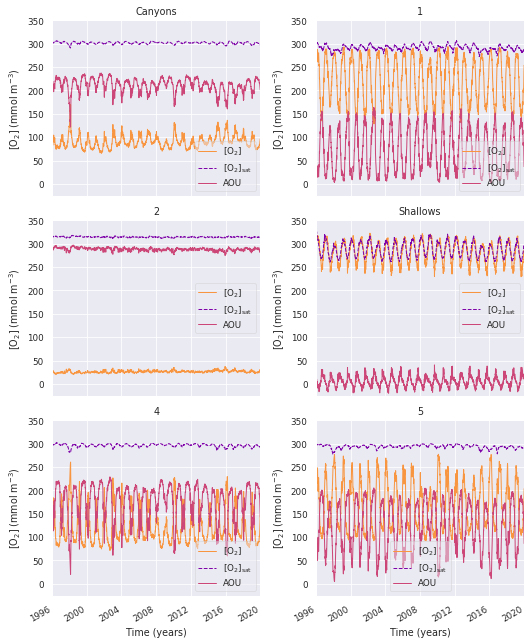

In [10]:
colors =itertools.cycle(plt.get_cmap('plasma')(np.linspace(0.25,0.75, 3)))
colorA=next(colors)
colorC=next(colors)
colorB=next(colors)
def plot_O2(cluster_id):
    clusters_ds[cluster_id][var].mean('stacked_y_x').plot(label='$[\mathrm{O}_2]$', ax=ax, linewidth=1,color=colorB)
    (clusters_ds[cluster_id]['AOU'].mean('stacked_y_x')+clusters_ds[cluster_id][var].mean('stacked_y_x')).plot(label='$[\mathrm{O}_2]_{\mathrm{sat}}$', linestyle='--', ax=ax, linewidth=1,color=colorA)
    clusters_ds[cluster_id]['AOU'].mean('stacked_y_x').plot(label='AOU', ax=ax, linewidth=1,color=colorC)
    ax.set_ylabel(f"{long_names[var]} ({units[var]})")
    plt.title(cluster_names[cluster_id])
    plt.axis('tight')
    X=ax.get_xticks()
    plt.grid('on')
    plt.xlim([X[1], X[-2]])
    plt.ylim([-25, 350])

fig=plt.figure(figsize=(Wf,Hf))
for c in np.arange(6):
    ax = fig.add_subplot(3,2,c+1)

    var='O2'
    cluster_id = plot_clusters[c]
    plot_O2(cluster_id)
    plt.legend(framealpha=0.5)
    
    if c==4 or c==5:
        plt.xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
        ax.set_xlabel('')
    if c==1:
        plt.legend(framealpha=0.5)

#ax = fig.add_subplot(2,1,2)


#cluster_id = plot_clusters[1]
#plot_O2(cluster_id)
plt.tight_layout()
plt.savefig('../Figures/AllClusters_oxygen_timeseries.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

let's try remaking the plot with the seasonal cylce removed

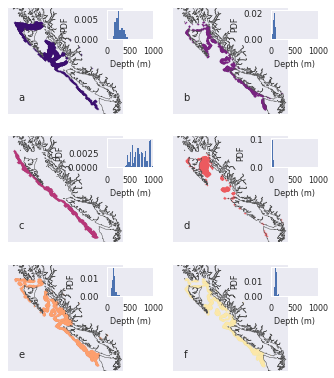

In [17]:
fig=plt.figure(figsize=(Wf,Hf))
################
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.95, 6)))
sns.set_style('darkgrid')
#sns.despine( top=True, right=True, left=False, bottom=False, offset=None, trim=False)
sns.reset_orig
#plt.rcParams["font.family"] = "Serif"
#colors=[colorA,colorB]
p=1

at=0.1
bt=.2
#ax = fig.add_subplot(2,2,p)
for ii in np.arange(6):
    if ii==0:
        p=1
    else:
        p=3
    cluster_id = ii#plot_clusters[ii]
    nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
    nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values
    ax = fig.add_subplot(4,2,ii+1, projection=ccrs.Miller())
    #ax.set_global()

    ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)
    #ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
    #ax.gridlines()

    plt.scatter(x=nlon, y=nlat,
                color=next(colors),
                s=.5,
                alpha=0.5,
                transform=ccrs.PlateCarree()) ## Important
    axins = inset_axes(ax, width="80%", height="90%",
                   bbox_to_anchor=(.82, .66, .5, .3),
                   bbox_transform=ax.transAxes, loc=3)
    D=clusters_ds[cluster_id].depths.values

    plt.hist(D.flatten(), **hist_kwargs, color='b')
    plt.xticks([0,500,1000], fontsize = 8)
    axins.grid()
    #if ii==2:
    #    plt.ylim([0,.075])
    #else:
    #    plt.ylim([0,.025])

    plt.xlim([0,1000])


    plt.ylabel(r'PDF', fontsize=8)
    plt.xlabel('Depth (m)', fontsize=8)
    lat1=56;lat2=47;lon1=-135;lon2=-122
    ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
    ax.text(at, bt, subpanel[ii], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
plt.subplots_adjust(wspace=-0.35)
#plt.tight_layout()
plt.savefig('../Figures/clusters_depths.png', format='png', bbox_inches='tight',transparent=False,dpi=500)

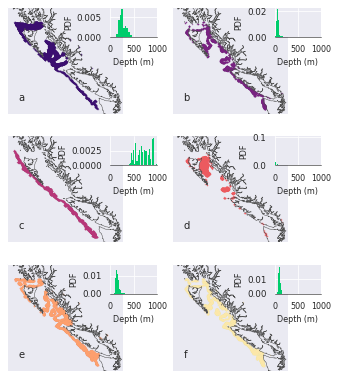

In [24]:
# Setting up figure dimensions
fig = plt.figure(figsize=(Wf, Hf))

# Setting up the color cycle and seaborn style
colors = itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2, 0.95, 6)))
sns.set_style('darkgrid')

# Constants for text positioning
at = 0.1
bt = 0.2

# Loop through clusters to create subplots
for ii in np.arange(6):
    if ii == 0:
        p = 1
    else:
        p = 3
    cluster_id = ii
    nlat = clusters_ds[cluster_id][var][0, :].nav_lat.values
    nlon = clusters_ds[cluster_id][var][0, :].nav_lon.values

    # Create subplot with geographic projection
    ax = fig.add_subplot(4, 2, ii + 1, projection=ccrs.Miller())
    
    # Add coastline feature
    ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)

    # Scatter plot of cluster data
    plt.scatter(x=nlon, y=nlat,
                color=next(colors),
                s=0.5,
                alpha=0.5,
                transform=ccrs.PlateCarree())

    # Inset histogram for depths
    axins = inset_axes(ax, width="80%", height="90%",
                       bbox_to_anchor=(0.8, 0.68, 0.5, 0.3),
                       bbox_transform=ax.transAxes, loc=3)
    D = clusters_ds[cluster_id].depths.values
    plt.hist(D.flatten(), **hist_kwargs, color=color1)
    plt.xticks([0, 500, 1000], fontsize=8)
    # Customize spines for the inset histogram
    # Customize spines for the inset histogram
    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False)
    axins.spines['left'].set_visible(False)
    axins.spines['left'].set_color('black')
    axins.spines['left'].set_linewidth(0.5)
    axins.spines['bottom'].set_visible(True)
    axins.spines['bottom'].set_color('black')
    axins.spines['bottom'].set_linewidth(0.5)
    plt.xlim([0, 1000])
    plt.ylabel(r'PDF', fontsize=8)
    plt.xlabel('Depth (m)', fontsize=8)

    # Set map extent and add subplot label
    lat1, lat2, lon1, lon2 = 56, 47, -135, -122
    ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
    ax.text(at, bt, subpanel[ii], transform=ax.transAxes, va='top', fontweight='normal', zorder=1000)

# Adjust the layout of the subplots
plt.subplots_adjust(wspace=-0.35)

plt.savefig('../Figures/clusters_depths.png', format='png', bbox_inches='tight',transparent=False,dpi=500)

In [12]:
# Split by upwelling season
downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
timeseries_vars = ['O2','OmegaA','T']
hist_kwargs = {
    'alpha':0.7,
    'density':True,
    'bins':200,
    'edgecolor':'None'
}

def filter_by_season_and_values(ds,month_range):       
    ds_out = ds.where(ds['time.month'].isin(month_range),drop=True)
    return ds_out

In [13]:
# plt.style.use(['seaborn-notebook'])

In [14]:
linecolors = dict(
    pdf = 'k',
    cdf = 'b'
)
linestyles = dict(
    Upwelling = '-',
    Downwelling = '--'
)

def plot_cdf_pdf(da_upwelling, da_downwelling, nbins=100):
    da_list = ((da_upwelling, 'Upwelling'), (da_downwelling, 'Downwelling'))
    for da, label in da_list:
        data = da.to_numpy().flatten()
        hist, edges = np.histogram(data, bins=nbins, density=True)
        cdf = integrate.cumtrapz(hist,edges[1:])
        
        plt.plot(edges[1:], hist, color=linecolors['pdf'], linewidth=1, linestyle = linestyles[label], label=f'{label}-PDF')
        plt.plot(edges[2:], cdf, color=linecolors['cdf'], linewidth=1, linestyle = linestyles[label], label=f'{label}-CDF')

In [15]:
def PickleforPlots(y):
    x=y.time

    # make a dataframe with groups separated that are over a day apart
    data = []
    g = 0
    for i in range(len(x)):
        x0 = x[i].values
        #print('xo', x0)
        y0 = y[i].values
        if i < (len(x)-1):
            x1 = x[i+1]
            td = x1 - x0
            #print(td)
            elapsed_days = td/np.timedelta64(1, 'D')
            
            if elapsed_days < 2:
                
                data.append([x0,y0, g])
            else:
                data.append([x0,y0, g])
                g+=1
        else:
            data.append([x0,y0, g])
    
    return pd.DataFrame(data, columns=['x', 'y', 'group'])
def plot_fraction_extreme(ax, ds, thresholds, vars, plot_months, extreme_is_low, label,color,saveit):
    #saveit=1 save the seasons in a dataframe that will allow for plotting the lines separately.
    #saveit=2 save the frac_)extreme for computing correlations
    #saveit=0 do not save, plot
    frac_extreme = calc_extremes(ds, thresholds, vars)
    frac_extreme = frac_extreme.where(frac_extreme['time.month'].isin(plot_months))
    if saveit=='lines': 
        outfile='pickles/'+label +'.pickle'
        print('saving:', outfile) 
        df=PickleforPlots(frac_extreme)
        with open(outfile, 'wb') as handle:
                pickle.dump(df, handle)
    elif saveit=='corr':
        outfile='pickles/'+label +'_corr.pickle'
        print('saving:', outfile)
        with open(outfile, 'wb') as handle:
            pickle.dump(frac_extreme, handle)
    else:
         ax.scatter(frac_extreme.time, frac_extreme, label=label, s=2, color=color)
    


Cluster label: 5
	O2 Upwelling: 80.5
	O2 Downwelling: 113.6
saving: pickles/Upwelling_5_O2.pickle
saving: pickles/Downwelling_5_O2.pickle
	OmegaA Upwelling: 0.6
	OmegaA Downwelling: 0.8
saving: pickles/Upwelling_5_OmegaA.pickle
saving: pickles/Downwelling_5_OmegaA.pickle
	T Upwelling: 8.0
	T Downwelling: 9.3
saving: pickles/Upwelling_5_T.pickle
saving: pickles/Downwelling_5_T.pickle


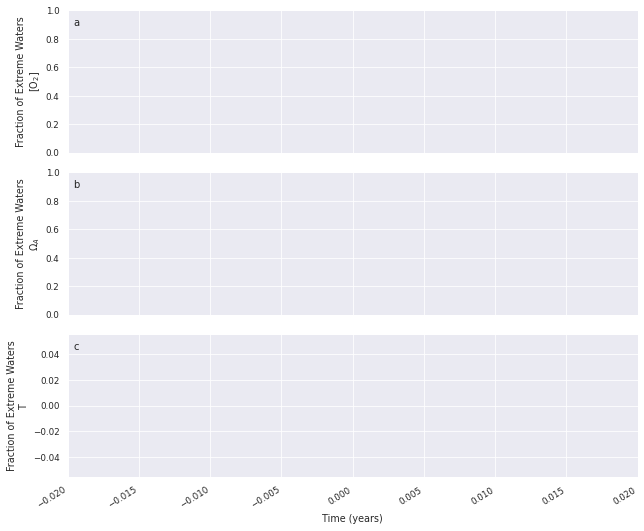

In [22]:
# Calculate extreme thresholds by upwelling/downwelling season and plot timeseries of percentage extremes
downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
timeseries_vars = ['O2','OmegaA','T']
hist_kwargs = {
    'alpha':0.5,
    'density':True,
    'bins':100
}

base_percentile = 0.1
percentiles = {
    'O2':base_percentile,
    'OmegaA':base_percentile,
    'T':1-base_percentile
}
at=0.01
bt=0.95
def calculate_threshold(ds, percentile, nbins=1000):
    data = ds.to_numpy().flatten()
    hist, edges = np.histogram(data, bins=nbins, density=True)
    cdf = integrate.cumtrapz(hist,edges[1:])
    return np.interp(percentile, cdf, edges[2:])    

def calc_extremes(ds, thresholds, vars):
    """Calculate which points in the domain exceed multiple thresholds"""
    is_extreme = xr.full_like(ds[vars[0]], True, dtype=bool)
    for var in vars:
        if var == 'T':
            is_extreme=is_extreme & (ds[var] >= thresholds[var])
        else:
            is_extreme=is_extreme & (ds[var] <= thresholds[var])
    npts = len(ds.stacked_y_x)
    frac_extreme = is_extreme.sum('stacked_y_x')/npts
    return frac_extreme


upwelling = {}
downwelling = {}

thresholds = {}

for cluster_label, cluster_ds in enumerate(clusters_ds):    
    if cluster_label in plot_clusters2[-1:]:
        thresholds[cluster_label] = {}
        thresholds[cluster_label]['upwelling'] = {}
        thresholds[cluster_label]['downwelling'] = {}
        ds_months = cluster_ds.groupby('time.month')
        
        # For every dataset separate data in upwelling and downwelling months
        upwelling_ds = filter_by_season_and_values(cluster_ds, upwelling_months)    
        downwelling_ds = filter_by_season_and_values(cluster_ds, downwelling_months)    
    
        upwelling[cluster_label] = upwelling_ds.copy()
        downwelling[cluster_label] = downwelling.copy()
        print(f'Cluster label: {cluster_label}')
                   
        fig, axs = plt.subplots(3, 1, sharex=True, figsize=(Hf,Wf))
        for idx, var in enumerate(timeseries_vars):         
            percentile = percentiles[var]
            upwelling_threshold = calculate_threshold(upwelling_ds[var],percentile)
            downwelling_threshold = calculate_threshold(downwelling_ds[var],percentile)
            thresholds[cluster_label]['upwelling'][var] = upwelling_threshold
            thresholds[cluster_label]['downwelling'][var] = downwelling_threshold
            print(f'\t{var} Upwelling: {upwelling_threshold:.1f}')
            print(f'\t{var} Downwelling: {downwelling_threshold:.1f}')
            plot_fraction_extreme(
                axs[idx],
                upwelling_ds, 
                thresholds[cluster_label]['upwelling'],
                [var],
                upwelling_months,
                percentile == base_percentile,
                f'Upwelling_{cluster_label}_{var}',
                color=color1,
                saveit="lines"
            )
            plot_fraction_extreme(
                axs[idx],
                downwelling_ds, 
                thresholds[cluster_label]['downwelling'],
                [var],
                downwelling_months,
                percentile == base_percentile,
                f'Downwelling_{cluster_label}_{var}',
                color=color2,
                saveit="lines"
            )

            axs[idx].set_ylabel(f'Fraction of Extreme Waters\n{long_names[var]}')
            if idx==2:
                axs[idx].set_xlabel('Time (years)')
                for label in axs[idx].get_xticklabels():
                    label.set_rotation(32)
                    label.set_horizontalalignment("right")
            plt.axis('tight')
            X=axs[idx].get_xticks()
            plt.xlim([X[1], X[-2]])  
            axs[idx].text(at, bt, subpanel[idx], transform=axs[idx].transAxes,  va='top', fontweight='normal',zorder=1000)


        fig.tight_layout()


see the LinePlots notebook for the line plot instead of scatter

In [17]:
def calc_concurrent_extremes(ds, thresholds, vars):
    is_extreme = xr.full_like(ds[vars[0]], True, dtype=bool)
    for var in vars:
        if var == 'T':
            is_extreme=is_extreme & (ds[var] >= thresholds[var])
        else:
            is_extreme=is_extreme & (ds[var] <= thresholds[var])
        npts = len(ds.stacked_y_x)
        frac_extreme = is_extreme.sum('stacked_y_x')/npts
        return frac_extreme
    
    

Cluster label: 5
saving: pickles/Upwelling_5_O2OmegaA.pickle
saving: pickles/Downwelling_5_O2OmegaA.pickle
saving: pickles/Upwelling_5_O2T.pickle
saving: pickles/Downwelling_5_O2T.pickle
saving: pickles/Upwelling_5_OmegaAT.pickle
saving: pickles/Downwelling_5_OmegaAT.pickle
saving: pickles/Upwelling_5_TO2.pickle
saving: pickles/Downwelling_5_TO2.pickle


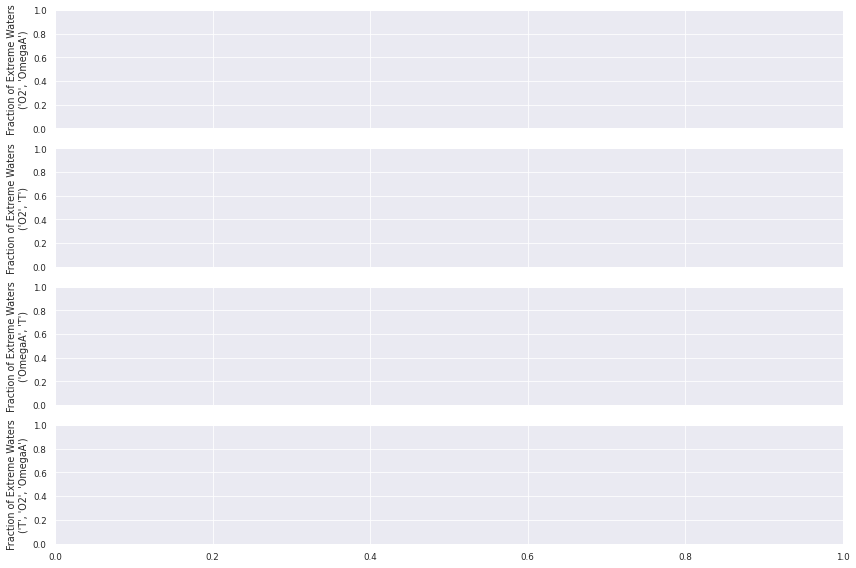

In [18]:
downwelling_months = [10, 11, 12, 1, 2, 3]
upwelling_months   = [4, 5, 6, 7, 8, 9]
dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]

for cluster_label, cluster_ds in enumerate(clusters_ds):    
    if cluster_label in plot_clusters2[-1:]:
        # For every dataset separate data in upwelling and downwelling months
        upwelling_ds = filter_by_season_and_values(cluster_ds, upwelling_months)    
        downwelling_ds = filter_by_season_and_values(cluster_ds, downwelling_months)    
    
        upwelling[cluster_label] = upwelling_ds.copy()
        downwelling[cluster_label] = downwelling.copy()
        print(f'Cluster label: {cluster_label}')

        
        fig, axs = plt.subplots(len(dual_extreme), 1, sharex=True, figsize=(12,8))
        for idx, vars in enumerate(dual_extreme):         
            plot_fraction_extreme(
                axs[idx],
                upwelling_ds, 
                thresholds[cluster_label]['upwelling'],
                vars,
                upwelling_months,
                True,
                 f'Upwelling_{cluster_label}_'+dual_extreme[idx][0]+dual_extreme[idx][1],
                color=color1, 
                saveit='lines'
            )
            plot_fraction_extreme(
                axs[idx],
                downwelling_ds, 
                thresholds[cluster_label]['downwelling'],
                vars,
                downwelling_months,
                True,
                f'Downwelling_{cluster_label}_'+dual_extreme[idx][0]+dual_extreme[idx][1],
                color=color2, 
                saveit='lines'
            )
            axs[idx].set_ylabel(f'Fraction of Extreme Waters\n{vars}')
        fig.tight_layout()

In [19]:
for idx, vars in enumerate(dual_extreme):
    print(dual_extreme[idx][0]+dual_extreme[idx][1])
    print(f'Upwelling_{cluster_label}_'+dual_extreme[idx][0]+dual_extreme[idx][1])
    print(vars) 

O2OmegaA
Upwelling_5_O2OmegaA
('O2', 'OmegaA')
O2T
Upwelling_5_O2T
('O2', 'T')
OmegaAT
Upwelling_5_OmegaAT
('OmegaA', 'T')
TO2
Upwelling_5_TO2
('T', 'O2', 'OmegaA')


In [ ]:
def count_average_length(array):
    """
    Calculate the duration of the times when a point in the cluster is extreme, return the average extreme duration
    """
    binary_string = ''.join(str(bit) for bit in array)
    
    # Split the string into runs of ones using the '0' character as a separator.
    ones_runs = binary_string.split('0')
    
    # Filter out empty strings (if the input binary string starts or ends with 0).
    ones_runs = [run for run in ones_runs if run != '']
    
    # Calculate and store the length of each run of non_zeroes
    run_lengths = [len(run) for run in ones_runs]
    
    mean_length = np.array(run_lengths).mean()
    return np.array([mean_length])

def plot_max_avg_duration(cluster_ds, var, threshold, season, season_months):
    var_ds = cluster_ds[var]
    if var == 'T':
        var_ds = var_ds.where(var_ds > threshold[season][var], 0)
    else:
        var_ds = var_ds.where(var_ds < threshold[season][var], 0)
    var_ds = var_ds.where(cluster_ds['time.month'].isin(season_months), 0)
    max_duration = []
    avg_duration = []
    years = []
    for year, ds_year in var_ds.groupby('time.year'):
        lengths = xr.apply_ufunc(count_average_length, ds_year.load(), input_core_dims = [['time']], vectorize=True)
        max_duration.append(lengths.max(dim='stacked_y_x'))
        avg_duration.append(lengths.mean(dim='stacked_y_x'))
        years.append(year) 
    print('var', var)
    print('The average duration is ', np.mean(avg_duration), 'And average max duration ', np.mean(max_duration))
    return np.mean(avg_duration), np.mean(max_duration)
    #plt.figure()
    #plt.bar(years, max_duration)

In [ ]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters:
        for var in timeseries_vars:
            plot_max_avg_duration(cluster_ds, var, thresholds[cluster_label], 'upwelling', upwelling_months)
            plt.title(var)

In [ ]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters:
        for var in timeseries_vars:
            plot_max_avg_duration(cluster_ds, var, thresholds[cluster_label], 'downwelling', downwelling_months)
            plt.title(var)

Intensity is defined here as the difference between the threshold and the observed value. For temperature ($T$) this is defined as

$I_T= T - T_{threshold}$

For $\Omega_A$ and $O_2$, the sign is reversed to maintain the convention that a positive intensity is considered an extreme event.

Annual cumulative intensity is defined as the sum of intensity and averaged over every point in the cluster. The average intensity is averaged both in time and over every point of the cluster

In [ ]:
def plot_cumulative_intensity(cluster_ds, var, threshold, season, season_months):
    var_ds = cluster_ds[var]

    # Positive intensity implies an extreme event, negative is not
    if var == 'T':
        intensity = var_ds - threshold[season][var]
    else:
        intensity = threshold[season][var] - var_ds
        
    intensity = xr.where(intensity < 0, np.nan, intensity)
    intensity = xr.where(~intensity['time.month'].isin(season_months), np.nan, intensity)

    cumulative_intensity = intensity.groupby('time.year').sum(['time']).mean('stacked_y_x', skipna=True)
    average_intensity = intensity.groupby('time.year').mean(['time', 'stacked_y_x'], skipna=True)

    plt.subplot(1,2,1)
    plt.plot(cumulative_intensity.year, cumulative_intensity)
    plt.title(var)
    plt.subplot(1,2,2)
    plt.plot(cumulative_intensity.year, average_intensity)
    plt.tight_layout()
    


In [ ]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters:
        print(f"Cluster: {cluster_label}")
        for var in timeseries_vars:
            plt.figure(figsize=(12,4))
            plot_cumulative_intensity(cluster_ds, var, thresholds[cluster_label], 'upwelling', upwelling_months)

In [ ]:
def calculate_max_severity(intensity):
    """
    Calculate the duration of the times when a point in the cluster is extreme, return the average extreme duration
    """

    intensity_str = ','.join([str(value) for value in intensity])
    
    # Split the string into runs of ones using the '0' character as a separator.
    ones_runs = intensity_str.split(',0.0,')

    run_severity = []
    # Calculate and store the length of each run of non_zeroes
    for run in ones_runs:
        values = np.asarray(run.split(','), dtype=float)
        run_severity.append(np.sum(values))

    if len(run_severity)>0:
        max_severity = np.max(run_severity)
        return np.array([max_severity])
    else:
        return np.array([0.])

def plot_max_severity(cluster_ds, var, threshold, season, season_months):
    var_ds = cluster_ds[var]
    if var == 'T':
        var_ds = var_ds - threshold[season][var]
    else:
        var_ds = threshold[season][var] - var_ds
    var_ds = var_ds.where(var_ds > 0, 0)
    var_ds = var_ds.where(cluster_ds['time.month'].isin(season_months), 0)
    max_duration = []
    avg_duration = []
    years = []
    
    for year, ds_year in var_ds.groupby('time.year'):
        lengths = xr.apply_ufunc(calculate_max_severity, ds_year.load(), input_core_dims = [['time']], vectorize=True)
        max_duration.append(lengths.max(dim='stacked_y_x'))
        avg_duration.append(lengths.mean(dim='stacked_y_x'))
        years.append(year) 
    plt.figure()
    plt.bar(years, max_duration)

calculate_max_severity(cluster_ds.isel(stacked_y_x=1000).T.values)

In [ ]:
test = ','.join([str(value) for value in cluster_ds.isel(stacked_y_x=1000).T.values])
np.array([float(value) for value in test.split('0.0')[0].split(',')])

In [ ]:
for cluster_label, cluster_ds in enumerate(clusters_ds):
    if cluster_label in plot_clusters:
        for var in timeseries_vars:
            plot_max_severity(cluster_ds, var, thresholds[cluster_label], 'upwelling', upwelling_months)
            plt.title(var)